<a href="https://colab.research.google.com/github/contangolife/BigAI/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4_%EA%B8%B0%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 설치

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 1. 패키지 리스트 업데이트 및 나눔 폰트 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 2. 폰트 캐시 갱신
!fc-cache -fv


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no

In [4]:
import os
import matplotlib.font_manager as fm

# 3) Nanum 폰트 디렉터리에서 .ttf 모두 읽어 addfont() 로 등록
nanum_dir = "/usr/share/fonts/truetype/nanum"
for fname in os.listdir(nanum_dir):
    if fname.lower().endswith(".ttf"):
        path = os.path.join(nanum_dir, fname)
        fm.fontManager.addfont(path)

# 4) 내부 매니저 다시 로드 (3.7+ 용)
fm._load_fontmanager()

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # Windows인 경우
# plt.rcParams['font.family'] = 'AppleGothic'  # MacOS인 경우

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

import math
from scipy.stats import logistic
from scipy.stats import trim_mean
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans

from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

# Lecture 7

In [ ]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.6 MB/s eta 0:00:00


In [ ]:
import FinanceDataReader as fdr

In [ ]:
df1=fdr.DataReader('005930', '2010-01-01')
df1.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2013-03-15,30580,30580,29599,29600,732367,NaN
2013-03-18,29200,29200,28680,28900,528791,-0.023649
2013-03-19,29000,29839,28960,29500,279542,0.020761
2013-03-20,29200,29700,29120,29200,270315,-0.010169
2013-03-21,29220,29480,29119,29140,235371,-0.002055


In [ ]:
# 일별 수익률을 구하고 이에 대한 요약통계량을 계싼한다. 일별 평균 수익률은 몇 %인가?
df1['return']=100*(df1['Close'].pct_change())  # daily return
df1['return'].describe()

,return
count,2999.000000
mean,0.035169
std,1.641274
min,-10.301508
25%,-0.959956
50%,0.000000
75%,0.906583
max,10.470588


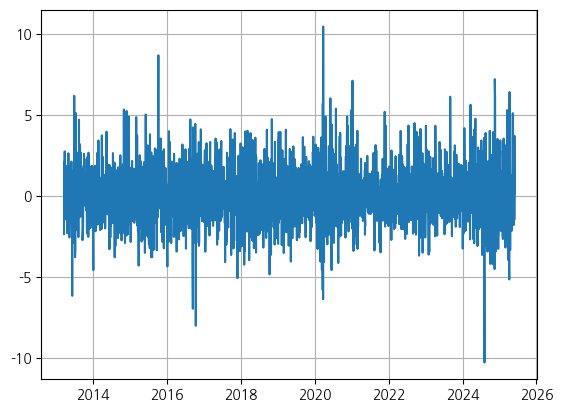

In [ ]:
plt.plot(df1['return'])
plt.grid()
plt.show()

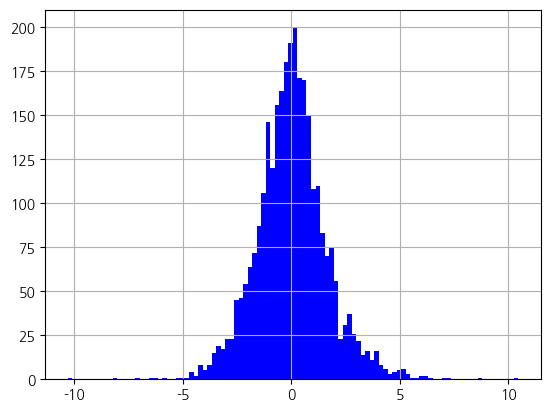

In [ ]:
# daily return의 분포를 이해하기 위해서 histogram을 그릴 수 있다.
plt.hist(df1['return'], bins=100, color='blue')
plt.grid()
plt.show()

In [ ]:
# 일별수익률과 동일한 평균, 분산을 가지는 가상의 정규분포를 생성하고 실제 데이터와 비교하자.

# 정규분포를 따르는 가상의 데이터를 3776개를 생성한다.
# mean=0.034125 std= 1.641155
np.random.seed(1234)
data=np.random.randn(3776)*1.641155+0.034125 # 정규분포 평균=0, 표준편차=1
data

array([ 0.80782318, -1.92045072,  2.3854192 , ..., -0.08689765,
        1.40249362, -1.18121039])

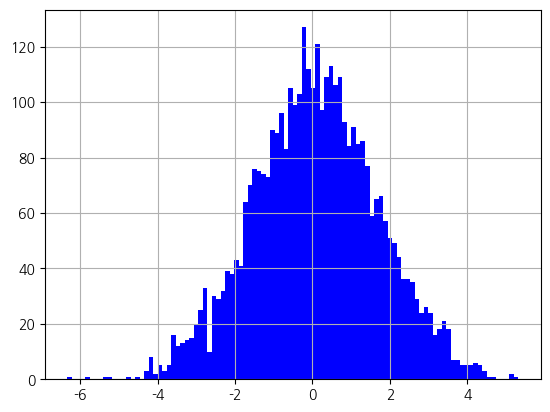

In [ ]:
plt.hist(data, bins=100, color='blue')
plt.grid()
plt.show()

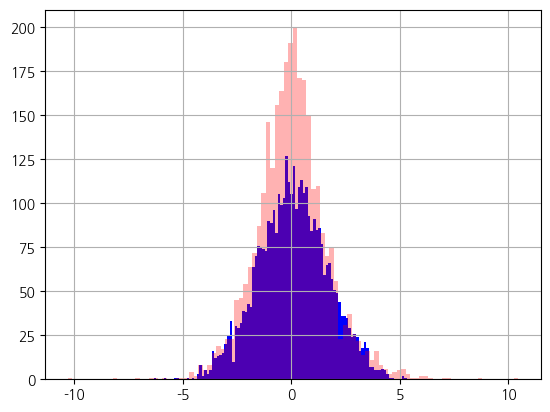

In [ ]:
#실제 수익률 데이터의 평균과 분산을 나타내라
plt.hist(data, bins=100, color='blue')
plt.hist(df1['return'], bins=100, color='red',alpha=0.3)
plt.grid()
plt.show()

#실제 수익률은 정규분포와 어떤 차이가 있는가?
#주식시장의 수익률이 극단적인 경우가 있으며, 0에 가까운 값들이 많은 것으로 보아 가격의 변화가 크지 않다.
#정규분포랑은 차이를 보인다.

In [ ]:
df1_1=df1.loc['2024-01-01':'2024-12-31']
r = df1_1['return']
r

,return
Date,
2024-01-02,1.401274
2024-01-03,-3.266332
2024-01-04,-0.519481
2024-01-05,0.000000
2024-01-08,-0.130548
...,...
2024-12-23,0.943396
2024-12-24,1.682243
2024-12-26,-1.470588


In [ ]:
# for 반복문을 사용하지 않고 p_rate을 계산하는 코드?
df1_1['up']=[1 if ret>0 else 0 for ret in r]
df1_1

,Open,High,Low,Close,Volume,Change,return,up
Date,,,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013,1.401274,1
2024-01-03,78500,78800,77000,77000,21753644,-0.032663,-3.266332,0
2024-01-04,76100,77300,76100,76600,15324439,-0.005195,-0.519481,0
2024-01-05,76700,77100,76400,76600,11304316,0.000000,0.000000,0
2024-01-08,77000,77500,76400,76500,11088724,-0.001305,-0.130548,0
...,...,...,...,...,...,...,...,...
2024-12-23,53400,54000,53300,53500,13672650,0.009434,0.943396,1
2024-12-24,53700,54500,53600,54400,11634677,0.016822,1.682243,1
2024-12-26,54500,54600,53500,53600,10517075,-0.014706,-1.470588,0


In [ ]:
positive_days=sum(df1_1['up'])
positive_days

105

In [ ]:
# 성공확률
success_rate = positive_days/len(df1_1)
success_rate

0.430327868852459

In [ ]:
# 5일 중 3일 상승할 확률: 이항분포 함수를 이용한다.
from scipy.stats import binom
binom.pmf(3,5,success_rate)

np.float64(0.25861181723138466)

In [ ]:
negative_days =len(df1_1) - positive_days
box=[0]*negative_days+[1]*positive_days
np.mean(box) #105/244랑 같음

np.float64(0.430327868852459)

In [ ]:
# 5장 카드 합의 기대값(평균)
5*np.mean(box)

np.float64(2.151639344262295)

In [ ]:
box=445*[1]+555*[0]
box

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
np.mean(box)

np.float64(0.445)

In [ ]:
# 주식이 거래된 일수 247일
# X_247의 기댓값 = n* 모평균
mean_val = 247*np.mean(box)

In [ ]:
# X_247의 표준오차 = sqrt(n)*모집단의 표준편차, 흔히 아는 standard error임
# 합의 표준오차
stand_err = np.sqrt(247)*np.std(box)

In [ ]:
# 신뢰구간
print(mean_val - stand_err, mean_val + stand_err)

102.10456947409428 117.72543052590574


In [ ]:
# 비율의 기댓값(평균의 기댓값) = 모평균 = 0.445
# 비율의 표준오차 = 모집단의 표준편차/ sqrt(n)
np.std(box)/np.sqrt(247)

np.float64(0.0316211762182418)

In [ ]:
# 비율의 신뢰구간
print(100*(np.mean(box) - np.std(box)/np.sqrt(247)), 100*(np.mean(box) + np.std(box)/np.sqrt(247)))

41.33788237817582 47.66211762182418


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/파이썬을 활용한 데이터/LN7_samsung_20250411 (1).csv', index_col='Date', parse_dates=True)
df1.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,16060,16180,16000,16180,239271,0.012516
2010-01-05,16520,16580,16300,16440,559219,0.016069
2010-01-06,16580,16820,16520,16820,459755,0.023114
2010-01-07,16820,16820,16260,16260,443237,-0.033294
2010-01-08,16400,16420,16120,16420,295798,0.009840


In [ ]:
# return : 일반 수익률을 계산한다.
df1['r']=100*(df1['Close'].pct_change())
df1.head()

,Open,High,Low,Close,Volume,Change,r
Date,,,,,,,
2010-01-04,16060,16180,16000,16180,239271,0.012516,NaN
2010-01-05,16520,16580,16300,16440,559219,0.016069,1.606922
2010-01-06,16580,16820,16520,16820,459755,0.023114,2.311436
2010-01-07,16820,16820,16260,16260,443237,-0.033294,-3.329370
2010-01-08,16400,16420,16120,16420,295798,0.009840,0.984010


In [ ]:
df1['log_r']=np.log(df1['Close'])-np.log(df1['Close'].shift(1)) #전일 대비 얼마나 올랐는지 로그 수익률 계산
df1.head()

,Open,High,Low,Close,Volume,Change,r,log_r
Date,,,,,,,,
2010-01-04,16060,16180,16000,16180,239271,0.012516,NaN,NaN
2010-01-05,16520,16580,16300,16440,559219,0.016069,1.606922,0.015941
2010-01-06,16580,16820,16520,16820,459755,0.023114,2.311436,0.022851
2010-01-07,16820,16820,16260,16260,443237,-0.033294,-3.329370,-0.033861
2010-01-08,16400,16420,16120,16420,295798,0.009840,0.984010,0.009792


In [ ]:
# 무작위 6개월 log수익률 추출해서 합한다. => 6개월 수익률
df1_1=df1.loc['2012-01-01':'2021-12-31']
df1_1.head()

,Open,High,Low,Close,Volume,Change,r,log_r
Date,,,,,,,,
2012-01-02,21400,21600,21300,21600,263300,0.020794,2.079395,0.020581
2012-01-03,21860,22100,21840,22100,339046,0.023148,2.314815,0.022884
2012-01-04,22100,22200,21500,21600,342389,-0.022624,-2.262443,-0.022884
2012-01-05,21460,21580,21100,21100,346691,-0.023148,-2.314815,-0.023420
2012-01-06,21120,21319,20600,20800,376753,-0.014218,-1.421801,-0.014320


In [ ]:
df1_2=df1_1['log_r']
df1_2

,log_r
Date,
2012-01-02,0.020581
2012-01-03,0.022884
2012-01-04,-0.022884
2012-01-05,-0.023420
2012-01-06,-0.014320
...,...
2021-12-24,0.007481
2021-12-27,-0.003734
2021-12-28,0.001246


In [ ]:
np.random.seed(1234)
sample=np.random.choice(df1_2, size=125, replace=True)
sample.sum()

np.float64(0.2747818274752092)

In [ ]:
# loop가 끝나면 sum_boots에는 1000개의 6개월치 수익률 값이 존재한다. 우리는 그 중에서 5% 손실에 해당하는 값을 찾는다. VaR95
sum_boots=[]
days=125 #6개월 거래일
n=1000 #반복 횟수
np.random.seed(1234)
for i in range(n):
    sample=np.random.choice(df1_2, size=days, replace=True)
    sample_sum=sample.sum()
    sum_boots.append(sample_sum)

In [ ]:
sum_boots

[np.float64(0.2747818274752092),
 np.float64(-0.010320116318968786),
 np.float64(-0.11850412371597407),
 np.float64(0.19305772290903533),
 np.float64(-0.12199331332387153),
 np.float64(0.22184586736752543),
 np.float64(0.3557494480476535),
 np.float64(-0.06937896237897867),
 np.float64(0.05266593159761612),
 np.float64(0.2925889703153022),
 np.float64(0.06815550386254188),
 np.float64(0.1354063932537457),
 np.float64(0.05463646732451899),
 np.float64(0.03829264050784431),
 np.float64(-0.04322771746009657),
 np.float64(-0.1339967753617497),
 np.float64(-0.15571475648636834),
 np.float64(-0.1342947794810314),
 np.float64(0.15652407161650572),
 np.float64(0.10004059730956705),
 np.float64(-0.14870181170688213),
 np.float64(0.1589782885173019),
 np.float64(0.31051141197920273),
 np.float64(0.1871538946417921),
 np.float64(0.15380718016842465),
 np.float64(-0.05300137694571205),
 np.float64(0.0963196107368649),
 np.float64(0.029242787694176542),
 np.float64(0.049827955250549394),
 np.float6

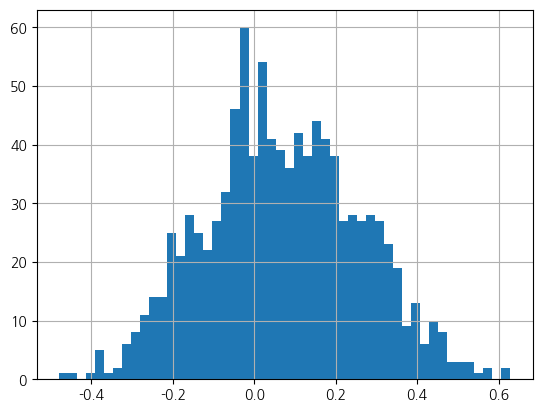

In [ ]:
# 1000개의 6개월 로그수익률의 histogram 그려보자.
plt.hist(sum_boots, bins=50)
plt.grid()
plt.show()

In [ ]:
# 6개월 투자 했을 때 VaR95 수익률을 찾아라.
ret5=np.percentile(sum_boots, 5)
ret5   #  VaR95에 해당하는 로그 수익률이 된다. 1억에서 2300만원 손해볼 수 있다. 5% 확률로 .

np.float64(-0.2325587495169852)

In [ ]:
# VaR 로그 수익률을 일반수익률로 환산하자.
ret5_1=np.exp(ret5)-1
ret5_1

np.float64(-0.2074968112004646)

In [ ]:
VaR95=ret5_1*100000000 # 1억 투자 6개월 보유라고 하는데 이거 문제 푸는 방식이 틀림. 6개월이 이어져 있어야 의미 있지 않나?
VaR95

np.float64(-20749681.12004646)

# Lecture 8

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/파이썬을 활용한 데이터/HOUSEHOLD_2024-1.csv')
df1

,기준년도,수도권여부,가구주_성별코드,가구원수,가구주_만연령,입주형태코드,경상소득(보완),가구주_직업대분류코드
0,2024,G1,2,1,77,2,1337,NaN
1,2024,G1,1,2,62,2,3664,5
2,2024,G1,2,1,31,3,3000,2
3,2024,G2,2,1,74,1,2341,NaN
4,2024,G2,1,1,56,1,3878,9
...,...,...,...,...,...,...,...,...
18309,2024,G2,1,1,38,3,1018,9
18310,2024,G2,1,2,75,1,974,NaN
18311,2024,G2,1,1,89,1,1798,NaN
18312,2024,G2,1,2,69,1,13000,6


In [ ]:
df1.info() #문자 변수가 몇개인지, 숫자 변수가 몇개인지 알 수 있음.(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18314 entries, 0 to 18313
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준년도         18314 non-null  int64 
 1   수도권여부        18314 non-null  object
 2   가구주_성별코드     18314 non-null  int64 
 3   가구원수         18314 non-null  int64 
 4   가구주_만연령      18314 non-null  int64 
 5   입주형태코드       18314 non-null  int64 
 6   경상소득(보완)     18314 non-null  int64 
 7   가구주_직업대분류코드  13492 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df1.rename(columns={'경상소득(보완)':'income'}, inplace=True)
df1.head()

,기준년도,수도권여부,가구주_성별코드,가구원수,가구주_만연령,입주형태코드,income,가구주_직업대분류코드
0,2024,G1,2,1,77,2,1337,NaN
1,2024,G1,1,2,62,2,3664,5
2,2024,G1,2,1,31,3,3000,2
3,2024,G2,2,1,74,1,2341,NaN
4,2024,G2,1,1,56,1,3878,9


In [ ]:
len(df1)

18314

In [ ]:
income=df1['income'].dropna() #결측치 행 제거
len(income) #얼마나 지워졌는지 확인.

18314

In [ ]:
# 표본 평균(X_bar)
np.mean(income)

np.float64(6607.786229114338)

In [ ]:
np.std(income)

7520.410913461484

In [ ]:
#표본 평균의 표준오차 (평균 소득에 표준오차)
standard_error = np.std(income)/np.sqrt(len(income))

In [ ]:
print(np.mean(income) - standard_error, np.mean(income) + standard_error) #표본평균에서 1표준편차 만큼의 구간

6552.215004667418 6663.357453561259


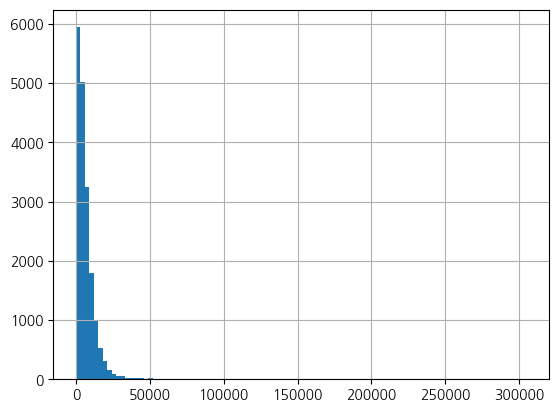

In [ ]:
plt.hist(income, bins=100)
plt.grid()
plt.show()

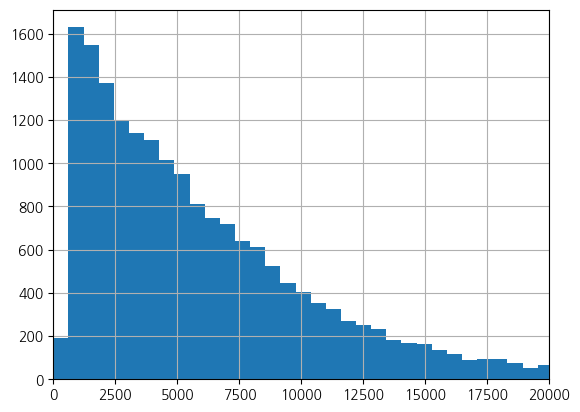

In [ ]:
plt.hist(income, bins=500) #bins는 구간을 정해서 그 구간에 속한 데이터를 표시
plt.xlim(0,20000) #x축 시각화에 제한을 두어 시각적으로 더 자세히 볼 수 있음
plt.grid()
plt.show()

In [ ]:
# 평균의 분포 : 정규분포
# 18,314가구 중에 500가구를 뽑아서 평균 소득을 만들어 보고 그 평균 소득의 분포를 그려보자.
# 500가구를 뽑아서 하나의 평균소득을 계산하고 그 평균소득을 10,000번 찾아서 분포를 그려보자.

n=10000
mn=[]
np.random.seed(1234)

for i in range(n):
    sample=np.random.choice(income, size=500, replace=True)
    m_sample=np.mean(sample)
    mn.append(m_sample)

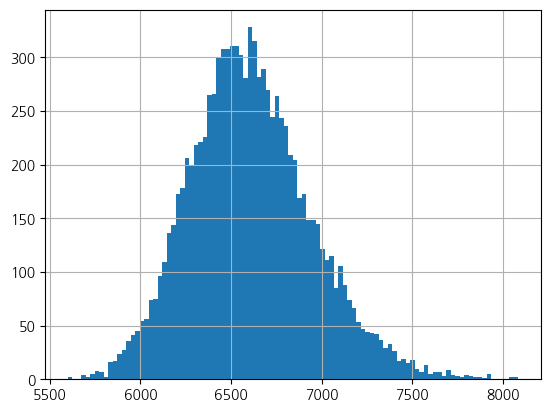

In [ ]:
# 분포 그래프를 작성한다.
plt.hist(mn, bins=100)
plt.grid()
plt.show()

In [ ]:
# 500가구의 평균 소득의 표준오차 - 모집단의 표준편차 / sqrt(500)
standard_error_500 = np.std(income)/np.sqrt(500)

In [ ]:
mean_500 = np.mean(mn)

In [ ]:
print(mean_500 - standard_error_500, mean_500 + standard_error_500)

6272.413731375376 6945.059732224623


In [ ]:
df19 = pd.read_csv('/content/drive/MyDrive/파이썬을 활용한 데이터/household_2019a.csv')
df20 = pd.read_csv('/content/drive/MyDrive/파이썬을 활용한 데이터/household_2020a.csv')

In [ ]:
df19_1 = df19[['year', 'id', 'income']]
df20_1 = df20[['year','id', 'income']]
df20_1.head()

,year,id,income
0,2020,10000112,6593
1,2020,10000132,17720
2,2020,10000162,908
3,2020,10000182,2748
4,2020,10000192,1015


In [ ]:
df3=pd.merge(df19_1, df20_1, on='id', how='inner') #같은 id로 묶어서 머지
df3

,year_x,id,income_x,year_y,income_y
0,2019,10600141,5385,2020,2695
1,2019,10600211,2772,2020,1563
2,2019,10600221,1140,2020,6014
3,2019,10600241,803,2020,851
4,2019,10600271,8021,2020,7264
...,...,...,...,...,...
13905,2019,993800291,5092,2020,179
13906,2019,994800251,16070,2020,15454
13907,2019,994800261,35030,2020,15098
13908,2019,994800291,6983,2020,9114


In [ ]:
df3['diff']=df3['income_y']-df3['income_x'] #20년 기준 전년대비 소득 차이
df3.head()

,year_x,id,income_x,year_y,income_y,diff
0,2019,10600141,5385,2020,2695,-2690
1,2019,10600211,2772,2020,1563,-1209
2,2019,10600221,1140,2020,6014,4874
3,2019,10600241,803,2020,851,48
4,2019,10600271,8021,2020,7264,-757


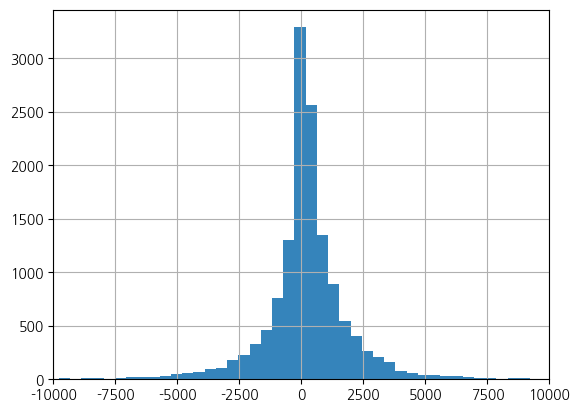

In [ ]:
plt.hist(df3['diff'], alpha=0.9, bins=500)
plt.xlim(-10000, 10000)
plt.grid()
plt.show()

In [ ]:
nom=df3['diff'].mean()

In [ ]:
dem=(df3['diff'].std())/np.sqrt(len(df3))

In [ ]:
z = nom/dem # 통계량(표본평균) - 귀무가설 기댓값(모평균) / 통계량의 표준오차
print(z) # z_score 구하기
#모집단의 표준편차는 알 수 없기 때문에 표본의 표준편차 s를 사용

8.51178829634799


In [ ]:
# p-value : 단측검정, 표준정규분포에서 z값이 8.5보다 클 확률, p-value는? (매우 작다)
from scipy.stats import norm
pv=1-norm.cdf(z)
print(pv)

0.0


In [ ]:
# 양측 검정인 경우에는 다음과 같이 p-value를 계산한다.
pv1=2*(1-norm.cdf(z))
print(pv1)

0.0


In [ ]:
from scipy.stats import ttest_1samp #표본의 갯수가 많지 않을 때, 모표준편차를 몰라서 표본 표준편차를 사용할 때.
t_stat, pval=ttest_1samp(df3['diff'], popmean=0)
print(t_stat) # 검정통계량, 표본평균이 귀무가설 평균에서 몇표준오차만큼 떨어져 있는지 계산

8.511788296347975


In [ ]:
print(pval) #p_value, 귀무가설이 참일 때, t값이 나올 확률 -> 매우 작음 즉, 소득의 차이가 존재함을 알 수 있음

1.8864171246644572e-17


#Lecture 9

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/파이썬을 활용한 데이터/household_2020a.csv')
df1.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3


In [ ]:
#1인 가구만 선택
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       18064 non-null  int64 
 1   metro      18064 non-null  object
 2   id         18064 non-null  int64 
 3   sex        18064 non-null  int64 
 4   age        18064 non-null  int64 
 5   number     18064 non-null  int64 
 6   education  18064 non-null  int64 
 7   marriage   18064 non-null  int64 
 8   asset      18064 non-null  int64 
 9   debt       18064 non-null  int64 
 10  income     18064 non-null  int64 
 11  income_d   18064 non-null  int64 
 12  industry   13214 non-null  object
 13  job        13214 non-null  object
 14  house      18064 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 2.1+ MB


In [ ]:
df1_1 = df1[df1['number'] == 1]
df1_1.head() #1인가구인 행만 출력

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3
6,2020,G2,10000222,1,52,1,4,1,7930,8000,2808,2443,C,9,1
15,2020,G1,10000342,1,28,1,7,1,20050,200,5603,4782,C,3,2
16,2020,G1,10000352,2,65,1,4,3,25700,0,2947,2721,NaN,NaN,1


In [ ]:
df1_2 = df1_1[(df1_1['age']>=30) & (df1_1['age']<=39)] #1인 가구 중에서 나이가 30~39세인 사람들만 필터링
df1_2.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
19,2020,G1,10001102,1,35,1,5,1,5252,0,1089,1033,L,5,2
134,2020,G2,11800271,2,30,1,6,1,17920,5000,3756,3032,O,4,2
157,2020,G1,12000102,1,30,1,6,1,540,0,2004,1812,G,5,3
190,2020,G1,12600311,1,36,1,6,1,1500,6280,5802,3959,C,2,3
191,2020,G1,12600321,2,31,1,6,1,1610,0,3032,1197,J,2,5


In [ ]:
df1_3 = df1_2[['sex', 'age', 'income']]
df1_3.head()

,sex,age,income
19,1,35,1089
134,2,30,3756
157,1,30,2004
190,1,36,5802
191,2,31,3032


In [ ]:
df1_m = df1_3[df1_3['sex']==1]
df1_f = df1_3[df1_3['sex']==2]

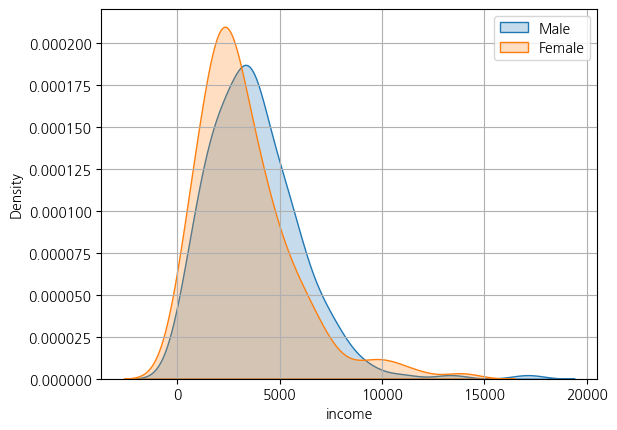

In [ ]:
# histogram or density curve
#30대 1인가구 남녀 소득별 분포
sns.kdeplot(df1_m['income'], shade=True, label='Male')
sns.kdeplot(df1_f['income'], shade=True, label='Female')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(len(df1_m),len(df1_f)) # 표본의 크기 차이가 존재하기 때문에 정규성 검증이 필요함.

243 145


In [ ]:
df1_3['income'].groupby(df1_3['sex']).agg(['mean', 'std', 'count']) # aggregation function 집계 함수

,mean,std,count
sex,,,
1,3756.971193,2285.066126,243
2,3309.848276,2354.872075,145


In [ ]:
z = (3756 - 3309)/ np.sqrt(2285**2/243 + 2354**2/145)
print(z)

1.8294109848010291


In [ ]:
# p-value
from scipy.stats import norm
pp1=2*(1-norm.cdf(z)) # 양측검정
print(pp1)
#차이가 있다 없다고 하면, 양측검정으로 귀무가설을 채택해야함.(차이가 없음)
#남자의 소득이 더 크다라고 하면, 단측검정으로 귀무가설 기각.

0.06733806325003067


In [ ]:
from scipy.stats import ttest_ind
t_stat, p_value=ttest_ind(df1_m['income'], df1_f['income'], equal_var=False)
print("test statistic =", t_stat)
print("p value=",p_value)

test statistic = 1.8294611302957282
p value= 0.06833730700337738


In [ ]:
male_income=[50000, 52000, 48000, 51000, 53000]
female_income=[47000, 46000, 49000,47500, 48000]
t_stat, p_value=ttest_ind(male_income, female_income, equal_var=False) #equal_var은 두 집단의 분산이 다르다는 가정.

In [ ]:
print("test statistic =", t_stat) #표본의 수가 적기 때문에 t-test진행
print("p value=",p_value)

test statistic = 3.3166247903554
p value= 0.014528250306071392


두 표본 평균 차이에 대한 Z-통계량 \
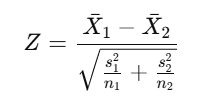

In [ ]:
from scipy.stats import chi2
DoF=5 #자유도
p_value=1-chi2.cdf(4.8, DoF) #4.8, x^2 통계량은 "(관측된 도수- 기대도수)/기대도수"의 전체 합
print(p_value)  # 귀무가설을 기각할 수 없다. 주사위 60번 던졌을 때, 각 면이 균등하다.

0.4407729680866631


In [ ]:
np.random.seed(1234)

def rolldie():
    one = two = three = four = five = six = 0

    for i in range(60):
        roll = np.random.choice([1, 2, 3, 4, 5, 6], size=1)[0]  # 배열에서 값만 추출
        if roll == 1:
            one += 1
        elif roll == 2:
            two += 1
        elif roll == 3:
            three += 1
        elif roll == 4:
            four += 1
        elif roll == 5:
            five += 1
        elif roll == 6:
            six += 1

    return [one, two, three, four, five, six]

result = rolldie()
print("각 면의 등장 횟수:", result)


각 면의 등장 횟수: [8, 11, 9, 13, 12, 7]


In [ ]:
np.random.seed(1234)

def simulate(n):
    chi2 = []
    for i in range(n):
        die = rolldie()  # [count_1, ..., count_6]
        distance = sum((x - 10)**2 for x in die) / 10
        chi2.append(distance)
    return chi2
simulate(10000)


[2.8,
 8.0,
 3.2,
 3.4,
 3.2,
 2.2,
 3.4,
 2.8,
 4.2,
 1.8,
 5.6,
 5.8,
 6.8,
 5.6,
 5.6,
 4.8,
 7.0,
 5.8,
 6.4,
 2.8,
 1.0,
 2.2,
 4.2,
 3.2,
 13.8,
 2.4,
 6.6,
 4.0,
 1.6,
 8.0,
 6.0,
 0.8,
 1.2,
 3.2,
 4.0,
 9.0,
 6.2,
 8.6,
 3.2,
 4.4,
 2.8,
 3.6,
 2.0,
 13.2,
 1.6,
 4.0,
 2.2,
 4.8,
 2.2,
 5.0,
 6.4,
 1.8,
 13.2,
 9.6,
 4.4,
 5.2,
 7.6,
 5.6,
 3.0,
 2.8,
 7.4,
 2.8,
 7.4,
 1.8,
 8.2,
 7.0,
 6.4,
 2.0,
 2.6,
 3.8,
 10.4,
 4.4,
 3.6,
 4.4,
 3.0,
 6.2,
 8.4,
 7.2,
 1.6,
 2.0,
 13.6,
 6.8,
 8.0,
 2.6,
 3.0,
 11.6,
 10.6,
 9.6,
 3.4,
 3.4,
 5.4,
 2.8,
 1.6,
 5.2,
 5.0,
 3.0,
 14.4,
 1.6,
 5.4,
 8.8,
 9.4,
 3.8,
 5.8,
 2.6,
 2.0,
 3.0,
 5.4,
 8.0,
 2.4,
 4.0,
 1.6,
 1.2,
 2.2,
 0.8,
 11.0,
 7.2,
 4.0,
 5.0,
 1.4,
 5.8,
 0.6,
 8.2,
 2.0,
 4.6,
 2.2,
 3.6,
 5.6,
 1.2,
 7.2,
 5.8,
 4.0,
 11.6,
 2.8,
 2.0,
 0.4,
 7.2,
 5.6,
 5.0,
 2.8,
 5.6,
 4.8,
 2.6,
 4.4,
 5.8,
 17.0,
 10.6,
 10.2,
 3.8,
 3.4,
 0.4,
 4.4,
 4.8,
 4.8,
 5.2,
 3.4,
 2.0,
 0.4,
 2.0,
 4.6,
 7.4,
 2.8,
 2.6,
 3.2,
 3.8,
 7.

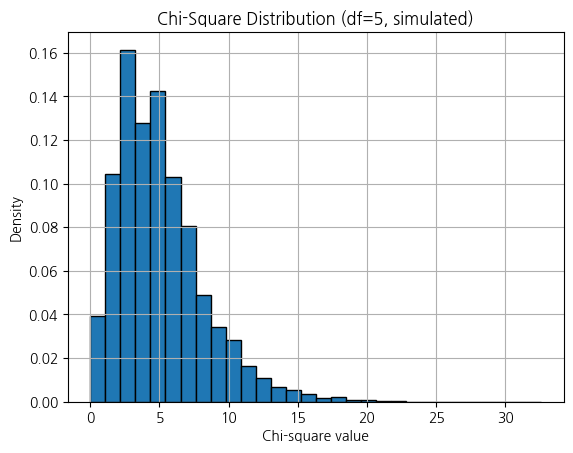

In [ ]:
import matplotlib.pyplot as plt

chi2_values = simulate(10000)

plt.hist(chi2_values, bins=30, edgecolor='black', density=True)
plt.title("Chi-Square Distribution (df=5, simulated)")
plt.xlabel("Chi-square value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [ ]:
critical_value=chi2.ppf(0.95,5) #누적 확률이 95%인 지점, 자유도 5
print(critical_value)

11.070497693516351


In [ ]:
df1

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,2020,G2,993800291,1,42,3,6,2,6705,2200,179,-390,NaN,NaN,3
18060,2020,G2,994800251,1,49,5,6,2,130180,22000,15454,11784,O,3,1
18061,2020,G2,994800261,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1
18062,2020,G2,994800291,2,53,2,7,4,109695,25000,9114,7074,O,2,2


In [ ]:
df1['job'].value_counts() #직업별로 코드

,count
job,
2,2043
3,1959
8,1919
9,1904
7,1455
6,1217
5,1205
4,1159
1,328


In [ ]:
df1_1=df1[['sex', 'job']]
df1_2=df1_1[df1_1['job']!='A']
df1_2['job'].value_counts() .sort_index()

,count
job,
1,328
2,2043
3,1959
4,1159
5,1205
6,1217
7,1455
8,1919
9,1904


In [ ]:
# two-way frequency table
pd.crosstab(df1_2['sex'], df1_2['job'])

job,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
1,316,1623,1644,558,882,1020,1379,1832,1318
2,12,420,315,601,323,197,76,87,586


In [ ]:
pd.crosstab(df1_2['sex'], df1_2['job'], margins=True) #margins는 전체 합도 추가로 출력해줌

job,1,2,3,4,5,6,7,8,9,All
sex,,,,,,,,,,
1,316,1623,1644,558,882,1020,1379,1832,1318,10572
2,12,420,315,601,323,197,76,87,586,2617
All,328,2043,1959,1159,1205,1217,1455,1919,1904,13189


In [ ]:
#job1의 비율 * 남성 전체 = job1을 갖는 남성 수
10572*(328/13189)

262.91727955114106

In [ ]:
#job1의 비율 * 여성 전체 = job1을 갖는 여성 수
2617*(328/13189)

65.0827204488589

In [ ]:
from scipy.stats import chi2_contingency
tab1=pd.crosstab(df1_2['sex'], df1_2['job'], margins=False)
chi2_test, p_value, dof, expected=chi2_contingency(tab1)
print(dof) # (9-1) * (2-1) => (n_a-1) * (n_b-1)

8


In [ ]:
print(expected) #각 직업별 성별 조합의 예상 빈도

[[ 262.91727955 1637.62195769 1570.28948366  929.02782622  965.90037152
   975.51929638 1166.29463947 1538.22640079 1526.20274471]
 [  65.08272045  405.37804231  388.71051634  229.97217378  239.09962848
   241.48070362  288.70536053  380.77359921  377.79725529]]


In [ ]:
print(p_value) # p-value < 0.05 => H_0를 기각한다. => 남녀 간 차이가 직업에 영향을 미친다.

0.0


In [ ]:
print(chi2_test) #기대(예측)값과 관측값의 차이가 매우 큼.

1487.2418760780276


In [ ]:
from scipy.stats import chi2
1-chi2.cdf(1487, 8) # p-value #귀무가설 기각

np.float64(0.0)

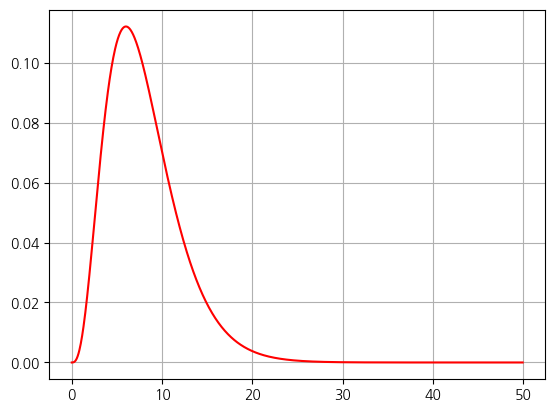

0.0


In [ ]:
x=np.arange(0,50, 0.05) #pdf 그리기
y=chi2.pdf(x, df=8) #자유도 8
plt.plot(x, y, color='red')
plt.grid()
plt.show()

p_value=1-chi2.cdf(1487.24, 8) #카이제곱의 분포를 p_value로 나타냄.
print(p_value)

# Lecture10

In [8]:
df1=pd.read_csv('/content/drive/MyDrive/파이썬을 활용한 데이터/education2020.csv')
df1.head()

,Unnamed: 0,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house,education_year
0,0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2,16
1,1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3,21
2,2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2,6
3,3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2,12
4,4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3,12


In [10]:
# y: income, x1: education_year, x2: age
# 다중 회귀모형
df1_1=df1[['income', 'age','education_year']]
df1_1.head()

,income,age,education_year
0,6593,34,16
1,17720,45,21
2,908,73,6
3,2748,58,12
4,1015,27,12


In [12]:
edu_model=ols('income~education_year+age', data=df1_1).fit() #income이 종속변수, education_year, age 독립변수
print(edu_model.summary())
#결과 분석, coef가 베타값임.
#교육 연수는 소득에 긍정적이고, 유의미한 영향 - 1년 증가, 488증가
#나이는 소득에 부정적이고 유의미한 영향을 미침 - 1살 증가, 9감소
#설명령 R^2는 낮음.

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     1773.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):               0.00
Time:                        05:07:48   Log-Likelihood:            -1.7980e+05
No. Observations:               18064   AIC:                         3.596e+05
Df Residuals:                   18061   BIC:                         3.596e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        322.1142    277.944      1.

E(Y|X1,...,Xk)=β0+β1X1+...+βkXk \
X1이라는 설명변수가 한 단위 변할 때, 종속변수 Y가 β1만큼 변한다.

In [33]:
edu=df1_1[['education_year', 'age']]
X=edu.values
X.shape

(18064, 2)

In [34]:
ones=np.ones(X.shape[0])

In [35]:
X_mat=np.column_stack((ones,X)) # β0 상수항 추가(편향 줄일 수 있음). 괄호 한번 더 쳐야함.
X_mat.shape #x_mat의 dimension을 출력

(18064, 3)

In [30]:
Y=df1_1['income'].values
Y.shape

(18064,)

In [36]:
# beta_hat=inv(X'X)*X'Y
beta_hat=np.linalg.inv(X_mat.T @ X_mat)@(X_mat.T @ Y) #회귀계수 추정량 구하는 공식
print(beta_hat) β^0 β^1 β^2
#standard error 생략

[322.11417475 488.05651908  -9.70719755]


In [21]:
df1_1.head()

,income,age,education_year
0,6593,34,16
1,17720,45,21
2,908,73,6
3,2748,58,12
4,1015,27,12


In [22]:
df1_1['age2']=df1_1['age']**2 #나이와 소득이 음의 관계라는 것에 의문을 갖고, 이차식으로 관계를 검증
df1_1.head()

,income,age,education_year,age2
0,6593,34,16,1156
1,17720,45,21,2025
2,908,73,6,5329
3,2748,58,12,3364
4,1015,27,12,729


In [23]:
edu_model_1=ols('income~education_year+age+age2', data=df1_1).fit()
print(edu_model_1.summary())
# 해석: 베타3가 음수인 동시에 베타2가 양수. 나이가 일정 수준까지 소득이 높아지다가 그 이상에서는 소득이 감소.
# 베타3가 음수인 동시에 베타2가 양수여야 한다. (시험) 1사분면에서 역 U자형이 되어야 하기 때문. (age > 0 = -b/2a > 0)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     1387.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):               0.00
Time:                        05:09:47   Log-Likelihood:            -1.7954e+05
No. Observations:               18064   AIC:                         3.591e+05
Df Residuals:                   18060   BIC:                         3.591e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -9472.0780    511.480    -18.

In [37]:
edu=df1_1[['education_year', 'age','age2']]
X=edu.values
ones=np.ones(X.shape[0])
X_mat=np.column_stack((ones,X))

Y=df1_1['income'].values
beta_hat=np.linalg.inv(X_mat.T @ X_mat)@(X_mat.T @ Y)
print(beta_hat)
#-9.47207797e+03 = -9.47207797 * 10^3

[-9.47207797e+03  4.43657211e+02  3.80629899e+02 -3.43928289e+00]


In [25]:
# -b/(2*a) > 0.
#소득이 최대가 되는 나이, 즉 미분해서 0이 되는 값. -> 55세
-(3.80629899e+02)/(2*-3.43928289e+00)

55.33564861830834

In [39]:
df1_1=df1.loc[df1['job']!='A']
df1_1['job'].value_counts()

,count
job,
2,2043
3,1959
8,1919
9,1904
7,1455
6,1217
5,1205
4,1159
1,328


In [40]:
df1_2=df1_1[['income','education_year', 'age']]
df1_2.head()

,income,education_year,age
0,6593,16,34
1,17720,21,45
2,908,6,73
3,2748,12,58
4,1015,12,27


In [49]:
sex_dummies=pd.get_dummies(df1_1['sex'])  # 숫자변수에 대해서만 이렇게 만들 수 있다.
sex_dummies.rename(columns={1:'male', 2:'female'}, inplace=True)
sex_dummies = sex_dummies.astype(int)
sex_dummies

,male,female
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
18059,1,0
18060,1,0
18061,1,0
18062,0,1


In [60]:
marr_dummies=pd.get_dummies(df1_1['marriage'])
marr_dummies.rename(columns={1:'m1', 2:'m2', 3:'m3', 4:'m4'}, inplace=True)
marr_dummies.astype(int)

,m1,m2,m3,m4
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
18059,0,1,0,0
18060,0,1,0,0
18061,0,1,0,0
18062,0,0,0,1


In [54]:
job_dummies=pd.get_dummies(df1_1['job'])
job_dummies.rename(columns={'1':'j1', '2':'j2', '3': 'j3'}, inplace=True)  # 문자이기 때문에 바뀌지 않다.
job_dummies.astype(int) # rename을 숫자에서 바꾸냐 아니면 문자에서 바꾸냐에 따라 ''를 붙이고 안붙이고 유의

,j1,j2,j3,4,5,6,7,8,9
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
18059,0,0,0,0,0,0,0,0,0
18060,0,0,1,0,0,0,0,0,0
18061,0,0,0,0,0,0,0,0,0
18062,0,1,0,0,0,0,0,0,0


In [55]:
df1_2.head()

,income,education_year,age
0,6593,16,34
1,17720,21,45
2,908,6,73
3,2748,12,58
4,1015,12,27


In [56]:
df1_3=pd.concat([df1_2, sex_dummies], axis=1)
df1_3.head()

,income,education_year,age,male,female
0,6593,16,34,1,0
1,17720,21,45,0,1
2,908,6,73,0,1
3,2748,12,58,1,0
4,1015,12,27,0,1


In [57]:
edu_model2=ols('income~education_year+age+male', data=df1_3).fit()
# female변수를 추가하지 않는 이유: dummy variabel trap (female + male = 1) -> 선형종속성이 발생
# marrage를 넣는다면, m1, m2, m3까지만 넣는다.
print(edu_model2.summary())
#결과분석: 남자가 1960만큼 소득이 높다. (여자보다) -> 여자 변수는 빠져있기 때문에 빠진 변수에 비해 어느정도 변화했는지 분석한다.

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     1362.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):               0.00
Time:                        06:22:07   Log-Likelihood:            -1.7933e+05
No. Observations:               18039   AIC:                         3.587e+05
Df Residuals:                   18035   BIC:                         3.587e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -111.6946    275.432     -0.

# Lecture 11